In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
%matplotlib inline

## Exercise 08.1 (function plotting)

Consider the function 

$$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$

from $x = -4\pi$ to $x = 4\pi$.  

1. Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.
1. Create an interactive plot with sliders for $\omega_{0}$ and $\omega_{1}$, varying from 0 to 2.

Plot for $\omega_0 = \omega_1 = 1$:

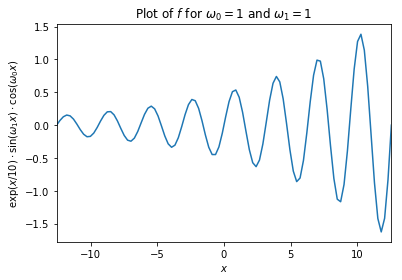

In [9]:
def function_plot(ω0=1, ω1=1):
    # Define x axis range
    x = np.linspace(-4*np.pi, 4*np.pi, 100)
    # Add labels to x and y axis
    plt.xlabel('$x$')
    plt.ylabel('$\exp(x/10) \cdot \sin(\omega_{1}x) \cdot \cos(\omega_{0}x)$')
    # Limit x axis between start and end point of the range
    plt.xlim(x[0], x[-1])
    # Add a title
    plt.title('Plot of $f$ for $ω_0 = {}$ and $ω_1 = {}$'.format(ω0, ω1))
    # Plot the function
    plt.plot(x, np.exp(x/10) * np.sin(ω1*x) * np.cos(ω0*x))

plot()

Plot with sliders for $\omega_0$ and $\omega_1$ from 0 to 2 with steps of 0.25:

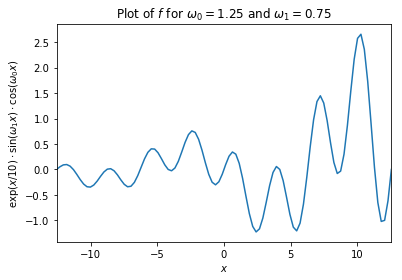

In [10]:
# Add sliders for the two parameters
interact(function_plot, ω0=(0, 2, 0.25), ω1=(0, 2, 0.25));

## Exercise 08.2 (multiple function plotting)

1. Plot the function 

   $$
   f(x)  = \frac{\sin(x)}{x}
   $$

   from $x = -6\pi$ to $x = 6\pi$. Think carefully about which $x$ values you use when 
   $x$ is close to zero.
  
1. Add to the above plot the graph of $1/ \left| x \right|$, and limit the range of the $y$ axis to 1 using
   `plt.ylim`. (Hint: use `np.abs(x)` to return the absolute values of each 
   component of a NumPy array `x`. 

Plot of $\sin(x) / x$ between $-6\pi$ and $6\pi$:

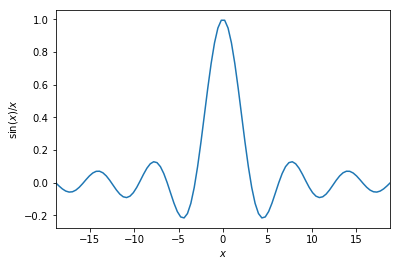

In [7]:
# Define x axis range using an even number of points to avoid division by 0
x = np.linspace(-6*np.pi, 6*np.pi, 100)
# Add labels to x and y axis
plt.xlabel('$x$')
plt.ylabel('$\sin(x)/x$')
# Limit x axis between start and end point of the range
plt.xlim(x[0], x[-1])
# Plot the function
plt.plot(x, np.sin(x)/x);

Plot of $\sin(x) / x$ and $1/\left| x \right|$ between $-6\pi$ and $6\pi$:

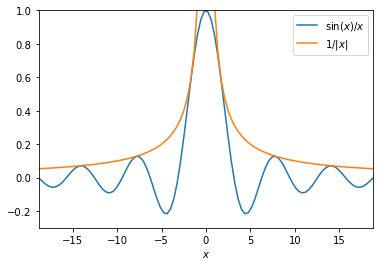

In [8]:
# Define x axis range using an even number of points to avoid division by 0
x = np.linspace(-6*np.pi, 6*np.pi, 100)
# Add label to x axis
plt.xlabel('$x$')
# Limit x axis between start and end point of the range
plt.xlim(x[0], x[-1])
# Limit y axis between -0.3 and 1
plt.ylim(-0.3, 1)
# Plot the first function
plt.plot(x, np.sin(x)/x, label='$\sin(x)/x$')
# Plot the second function on the same plot
plt.plot(x, 1/np.abs(x), label='$1/|x|$')
# Add a legend
plt.legend();

## Exercise 08.3 (demographics and interactive plotting)

A county planning body has requested an interactive tool to visualise the population distribution in Cambridgeshire (by district) from 2011 to 2021 for different population growth rate scenarios in each district. It can be assumed that:

- the growth rates are constant in each district;
- the growth rate will not be negative in any district; and 
- the annual growth rate in any one district will not exceed 10%.

Building on the pie chart example with population data in the body of the notebook, create an interactive plot with:

1. A slider for the year (from 2011 to 2021); and
2. Sliders for the annual population growth for each district (in percentage), with an 
   initial value of zero for each district.

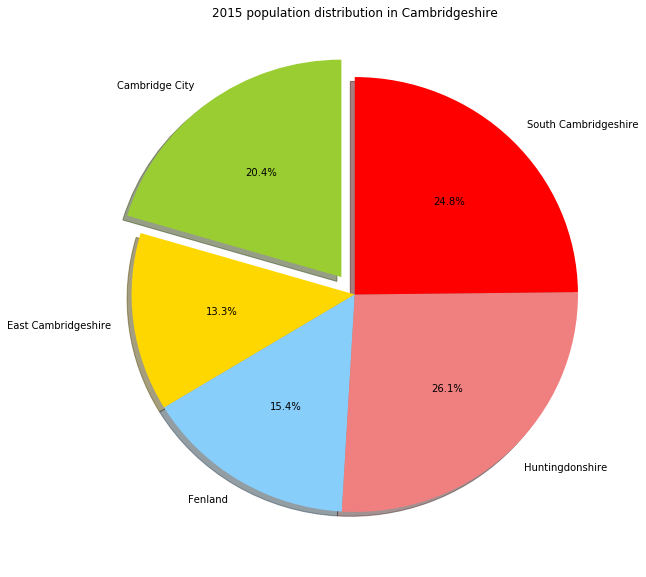

In [11]:
def demographics_plot(year=2011, grCC=0, grEX=0, grFL=0, grHS=0, grSC=0):
    
    # Initialize district tuple, population and annual growth arrays
    district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
                'South Cambridgeshire')
    population = np.array((123900, 83800, 95300, 169500, 148800))
    annual_growth = np.array((grCC, grEX, grFL, grHS, grSC))
    
    # Specify slice colours
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

    # Explode the 1st slice (Cambridge City)
    explode = (0.1, 0.0, 0, 0, 0)
    
    # Set figure size
    plt.figure(figsize=(10,10))

    # Plot pie chart using a linear annual growth in population
    plt.pie(population * (1 + (year-2011) * annual_growth / 100), explode=explode, labels=district, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)

    # Add title
    plt.title('{} population distribution in Cambridgeshire'.format(year))

# Add sliders for the annual growth of each district
interact(demographics_plot,
         year=(2011, 2021, 1),
         grCC=(0, 10, 0.1),
         grEX=(0, 10, 0.1),
         grFL=(0, 10, 0.1),
         grHS=(0, 10, 0.1),
         grSC=(0, 10, 0.1));

## Exercise 08.4 (crime reports by location)


### Background

Your task is to produce a crime report data plot in the neighborhood of your college, by reported crime
category. It will be interesting to see how this varies between colleges!

We can get crime data in the UK from the police data systems using what is known as a REST API,
and turn the data into a list of Python dictionaries. Each entry in the list is a police report 
(an entry is a Python dictionary detailing the report).

The first step is the import the modules we will be using:

In [12]:
import json
import requests

The service https://data.police.uk has an interface where we can add specific strings to the URL (web address) to define what data we are intersted in, and the police server will return our requested data. The format is

    https://data.police.uk/api/crimes-street/all-crime?poly=[LAT0],[LON0]:[LAT1],[LON1]:[LAT2,LON2]&date=YYYY-MM
    
This return crimes reports in the triangle given by the three geographic coordinate points `(latitude0, longitude0), (latitude1, longitude1) and (latitude2, longitude2)`, for the month `YYY-MM`.          

Below we create this URL string to include a large part of the Cambridge city centre. You can modify this for your own college or other area of interest (Google Maps is a handy way to get the geographic coordinates).

In [13]:
# A triangle that includes most of the Cambridge city centre
# (long, lat) for three vertices of a triangle (no spaces!)
p0 = '52.211546,0.116465'
p1 = '52.203510,0.145500'
p2 = '52.189730,0.113050'

# year-month of interest
year_month = '2016-05'

# Construct request URL string using the above data
url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + year_month

# Fetch data from https://data.police.uk
r = requests.get(url)

The following converts the fetched data into a list of dictionaries:

In [14]:
crime_data = r.json()

To get an idea of how the data is arranged, we can look at the first report in the list. To make the displayed data easier to read, we use the 'pretty print' module `pprint`.

In [15]:
import pprint
if crime_data:
    pprint.pprint(crime_data[0])

{'category': 'anti-social-behaviour',
 'context': '',
 'id': 48727186,
 'location': {'latitude': '52.205885',
              'longitude': '0.121266',
              'street': {'id': 560747, 'name': 'On or near Shopping Area'}},
 'location_subtype': '',
 'location_type': 'Force',
 'month': '2016-05',
 'outcome_status': None,
 'persistent_id': ''}


### Task


Produce a bar chart of the number of reports in different categories. The categories are: 

In [16]:
categories = ('anti-social-behaviour', 'bicycle-theft', 'burglary', 'criminal-damage-arson', \
              'drugs', 'other-crime', 'other-theft', 'public-order', 'shoplifting', \
              'theft-from-the-person', 'vehicle-crime', 'violent-crime')

This function retrieves data from the UK police URL and returns it in a json; the default parameters for the coordinates are that of Cambridge used above:

In [17]:
def get_crime_data(year_month, p0='52.211546,0.116465', p1='52.203510,0.145500', p2='52.189730,0.113050'):
    "Get the crime data for a given year and month (in the format YYYY-MM) and coordinates"
    # Construct request URL string using the above data
    url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + year_month
    # Fetch data from https://data.police.uk
    r = requests.get(url)
    
    return r.json()

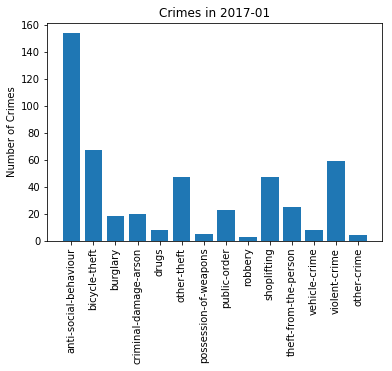

In [18]:
def crime_plot(year_month, p0='52.211546,0.116465', p1='52.203510,0.145500', p2='52.189730,0.113050'):
    "Plot the crime data on a barplot for a given year and month (in the format YYYY-MM) and coordinates"
    # Get the crime data
    crime_data = get_crime_data(year_month, p0, p1, p2)
    # Initialize a dict for crime category frequencies
    categories_freq = {}
    # Count the frequencies
    for crime in crime_data:
        curr_category = crime['category']
        if curr_category in categories_freq:
            categories_freq[curr_category] += 1
        else:
            categories_freq[curr_category] = 1
    
    # Define values for x axis ticks
    x_values = np.arange(len(categories_freq))
    # Create barplot
    plt.bar(x_values, categories_freq.values(), align='center')
    # Add labels to x axis ticks
    plt.xticks(x_values, categories_freq.keys(), rotation=90)
    # Add axis labels
    #plt.xlabel('Crime Category')
    plt.ylabel('Number of Crimes')
    # Add title
    plt.title('Crimes in {}'.format(year_month))

# Test for a month
crime_plot('2017-01')

Run your program for different parts of Cambridge, starting with the area around your college, and for different months and years.

#### Hints:

Create an empty dictionary, which will eventually map the report category to the number of incidents:

In [ ]:
categories_freq = {}

Iterate over all reports in the list, and extract the category string from each report. If the category string (the 'key') is already in the dictionary increment the associated counter. Otherwise add the key to the dictionary, and associate the value 1.

In [ ]:
# Iterate over all reports
for report in crime_data:
    # Get category type from the report
    category = report['category']
    
    if category in categories_freq:
        # Increment counter here
        pass  # This can be removed once this 'if' block has a body
    else:
        # Add category to dictionary here
        pass  # This can be removed once this 'else' block has a body

When adding the tick labels (crime categories), it may be necessary to rotate the labels, e.g.:
```python
plt.xticks(x_pos, categories, rotation='vertical')
```

### Extensions (optional)

1. Probe the retrieved data to build a set of all crime categories in the data set.
2. Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident 
   types over time.

Create a list containing all crimes in a given period:

In [19]:
# Initialize the starting year and month and the number of months to retrieve
start_year, start_month, num_months = 2016, 1, 6
# Initialize an empty list for all crimes
all_crimes = []
#crime_freq = {}

for unused in range(num_months):
    # For every month in range get crime data
    crime_data = get_crime_data(str(start_year) + '-' + str(start_month))
    
    # Append every crime retrieved to the list of all crimes
    for crime in crime_data:
        all_crimes.append([crime['id'], crime['month'], crime['category']])
    
    # Update month and year
    start_month += 1
    if start_month % 13 == 0:
        start_month = 1
        start_year += 1

Create a plot to represent crimes by year-month and category (not sure about order of the data in the dictionary):

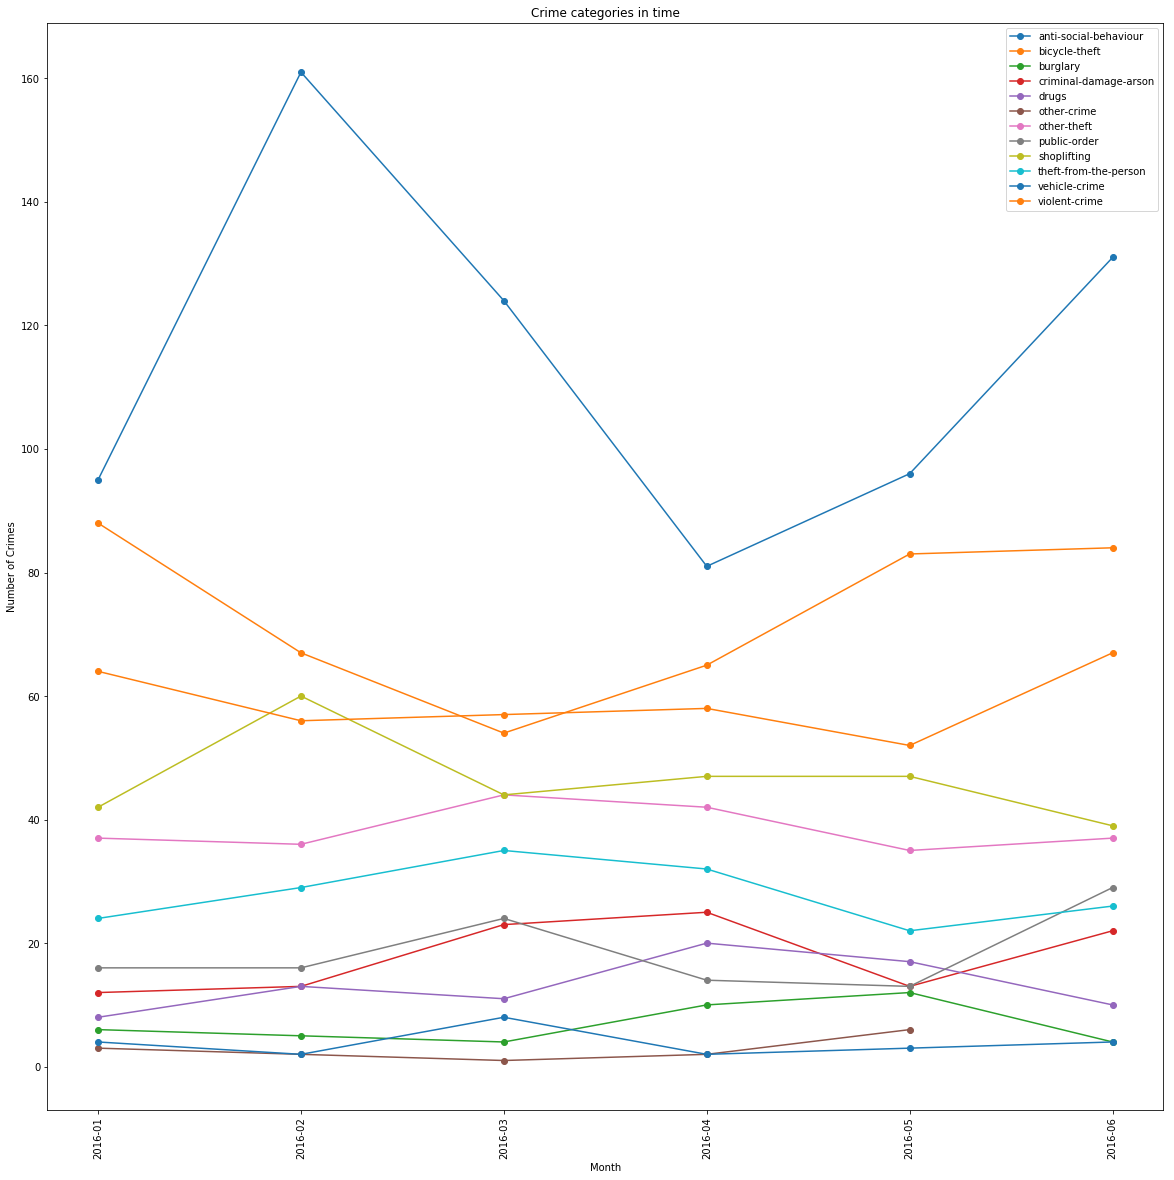

In [39]:
# Initialize figure setting size
plt.figure(figsize=(20,20))
# for each category in the above list create a dict of frequencies and plot it on a line
for category in categories:
    category_freq = {}
    for crime in all_crimes:
        if crime[2] == category:
            if crime[1] in category_freq:
                category_freq[crime[1]] += 1
            else:
                category_freq[crime[1]] = 1
    # Define values for x axis ticks
    x_values = np.arange(len(category_freq))
    # Create a plot using dict values (not sure if they are in the right order here...)
    plt.plot(x_values, list(category_freq.values()), '-o', label=category)
    # Add x axis values labels using keys
    plt.xticks(x_values, category_freq.keys(), rotation=90)

# Add legend, title and labels
plt.legend()
plt.title('Crime categories in time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes');